In [4]:
f_devtest="simmc2_dials_dstc10_devtest.json"
f_dev="simmc2_dials_dstc10_dev.json"
f_train="simmc2_dials_dstc10_train.json"
files = [f_devtest,f_dev,f_train]

In [5]:
import cv2
from matplotlib import pyplot as plt
import json
from glob import glob
from pathlib import Path
from os import listdir
from os.path import isfile, join
cwd = Path().resolve()

In [6]:
def load_json(filename):
    with open(filename,mode="r") as f:
        return json.load(f)

def save_json(data,filename):
    with open(filename, mode="w") as f:
        json.dump(data,f)
    return

data=[]
for f in files:
    data.extend(load_json(f)["dialogue_data"])

In [7]:
# Get scene files (bbox + relationship)
scene_folder = "/home/nlplab7/Desktop/youngjae/data/simmc2_scene_jsons_dstc10_public"
scene_list = sorted(glob(str(scene_folder + "/*_scene.json")))

image_path1=str(cwd)+  "/simmc2_scene_images_dstc10_public_part2"
image_path2=str(cwd)+ "/simmc2_scene_images_dstc10_public_part1"
image_files1 = [f for f in listdir(image_path1) if isfile(join(image_path1, f))]
image_files2 = [f for f in listdir(image_path2) if isfile(join(image_path2, f))]

In [8]:
def get_image(scene_name):
    scene_image=scene_name
    try:
        if scene_image[0]=="m":
            scene_image=scene_image[2:]
        if scene_image + ".png" in image_files1:
            im = cv2.imread(image_path1 + "/" + scene_image + ".png")
        elif scene_image + ".png" in image_files2:
            im = cv2.imread(image_path2 + "/" + scene_image + ".png")
        else:
            print("there is no image available")
            return None
    except Exception as e:
        print(e)
        print("error image: " + scene_image + ".png")
    return im

In [9]:
def get_bbox(scene_name):
    matching = [s for s in scene_list if scene_name+"_scene.json" == s.split("/")[-1]]
    return load_json(matching[0])

In [10]:
def get_objects(scene_name,idx_list):
    scene_image=get_image(scene_name)
    scene_bbox=get_bbox(scene_name)["scenes"][0]["objects"]
    objects={}
    for idx in idx_list:
        obj=[x for x in scene_bbox if x['index'] == idx]
        if obj:
            try:
                bbox = obj[0]["bbox"]
                x=bbox[0]
                y=bbox[1]
                h=bbox[2]
                w=bbox[3]
                if h==0 or w==0:
                    raise Exception('bounding box size is zero!')
                crop_img = scene_image[y:y+h, x:x+w]
            # error if image size is 0.
            except Exception as e:
                print(e)
                continue
            objects[idx]=crop_img
    return objects
            

In [11]:
def view_dialogue(d_idx):
    try:
        q_res = [x for x in data if x["dialogue_idx"]==d_idx][0]
    except Exception as e:
        print(e)
        return
    dialog = q_res
#     try:
#         threshold_idx = int(list(dialog["scene_ids"].keys())[1])
#     except:
#         threshold_idx = 9999
    cur_scenes = dialog["scene_ids"].values()
    for t in dialog["dialogue"]:
        print("\n\n")
        print("Turn: "+str(t["turn_idx"]))
        #### get image
        idx_list =t["system_transcript_annotated"]["act_attributes"]["objects"]
        target_idx_list=t["transcript_annotated"]["act_attributes"]["objects"]
            
        #### User
        print(t["transcript"])
        print("user items:")
        print(target_idx_list)           
        # show image
        
        
        print(t["system_transcript"])
        print("system items:")
        
        turn_objects={}
        for cs in cur_scenes:
            turn_objects.update(get_objects(cs,idx_list))
        for to,im in turn_objects.items():
            print(str(to)+": ")
            im=cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
            plt.imshow(im)
            plt.show()      
    print(dialog["scene_ids"])

# #Import image
# image = cv2.imread("input_path")

# #Show the image with matplotlib
# plt.imshow(image)
# plt.show()        




Turn: 0
I'm looking for a good small jacket to add to my closet. Do you have any?
user items:
[]
How about the black jacket to the top right or the black one in the second slot from the right?
system items:
23: 


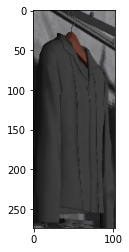

52: 


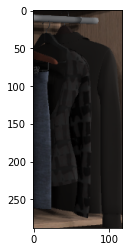




Turn: 1
I love both of those! I'll take them.
user items:
[52, 23]
Great! I'll add both of those for you now!
system items:
52: 


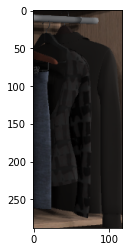

23: 


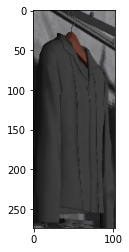




Turn: 2
How about some good pants to go with that?
user items:
[]
What do you think of the brown pants or the grey ones to the left of them?
system items:
53: 


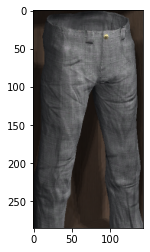

54: 


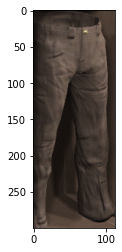




Turn: 3
How about anything brown with full sleeves?
user items:
[]
I don't have any matches for that.
system items:



Turn: 4
Anything in a small size?
user items:
[]
I didn't find anything like that for pants.
system items:



Turn: 5
Ok, how about any blouses with a red, white, and yellow color and good ratings?
user items:
[]
How about the tricolor option against the wall?
system items:
25: 


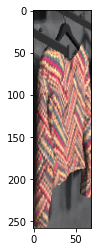




Turn: 6
Anything similar in price to it but with vertical stripes?
user items:
[25]
Sorry, I didn't get any hits.
system items:
{'0': 'm_cloth_store_1416238_woman_15_6', '5': 'm_cloth_store_1416238_woman_15_8'}


In [17]:
view_dialogue(10600)


In [76]:
print(data[:10])

[{'dialogue': [{'turn_idx': 0, 'system_transcript': 'What do you think of the grey pair on the left?', 'system_transcript_annotated': {'act': 'INFORM:GET', 'act_attributes': {'slot_values': {'type': 'jeans', 'pattern': 'plain'}, 'request_slots': [], 'objects': [29]}}, 'transcript': 'Do you have any plain jeans?', 'transcript_annotated': {'act': 'REQUEST:GET', 'act_attributes': {'slot_values': {'type': 'jeans', 'pattern': 'plain'}, 'request_slots': [], 'objects': []}}}, {'turn_idx': 1, 'system_transcript': "There's a maroon one on the wall on the right, and a brown one and a grey one on the rack.", 'system_transcript_annotated': {'act': 'INFORM:GET', 'act_attributes': {'slot_values': {'type': 'dress'}, 'request_slots': [], 'objects': [42, 14, 36]}}, 'transcript': 'Sorry, I misspoke. Can you show me dresses instead?', 'transcript_annotated': {'act': 'REQUEST:GET', 'act_attributes': {'slot_values': {'type': 'dress'}, 'request_slots': [], 'objects': []}}}, {'turn_idx': 2, 'system_transcrip

In [92]:
#############
# Divide task into easy and hard.
# Evaluate how model performs
# Compute the distribution 

In [93]:
f_devtest="simmc2_dials_dstc10_devtest.json"
f_dev="simmc2_dials_dstc10_dev.json"
f_train="simmc2_dials_dstc10_train.json"
files = [f_devtest,f_dev,f_train]

In [97]:
devtest_data = load_json(f_devtest)
train_data = load_json(f_train)

In [98]:
def easy_hard_division(data):
    
    # Initialize needed info
    dialogues = data["dialogue_data"]
    
    turn_count = 0
    object_count = 0
    easy_object_count = 0
    hard_object_count = 0
    
    # Get number of all turns
    for d in dialogues:
        for i,t in enumerate(d["dialogue"]):
            turn_count +=1
            
            for o in t["transcript_annotated"]["act_attributes"]["objects"]:
                object_count += 1
                
                sys_objects = []
                if t["turn_idx"] != 0:
                    sys_objects.extend(d["dialogue"][i-1]["system_transcript_annotated"]["act_attributes"]["objects"])
                sys_objects.extend(t["system_transcript_annotated"]["act_attributes"]["objects"])
                
                if o in sys_objects:
                    easy_object_count+=1
                else:
                    hard_object_count +=1
                    
            
            
            
    
    
    
    # If easy + 1
    
    
    
    # Else hard + 1
    
    # Easy 정답율
    
    # Hard 정답율
    
    
    # returns dictionary that contains info on distribution
    return {"easy" : easy_object_count, "hard" : hard_object_count, "total" : object_count, "total_turns" : turn_count}

In [96]:
easy_hard_division(devtest_data)

{'easy': 6185, 'hard': 1079, 'total': 7264, 'total_turns': 8609}

In [99]:
easy_hard_division(train_data)

{'easy': 27573, 'hard': 4549, 'total': 32122, 'total_turns': 38127}

In [ ]:
# 틀린 경우들 뽑아볼것.